In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Amazon product Reviews preprocessing link :
https://github.com/alaBay94/Sentiment-analysis-amazon-Products-Reviews/blob/master/SentimentAnalysisAmazon.ipynb
-  38548 reviews on 25 products

In [2]:
Reviews = pd.read_csv('Reviews.csv',sep = '\t')

In [4]:
Reviews.head(n=2)

,Unnamed: 0,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text,Class
0,0,B0009PG35M,ASICS&#174; Men's GEL-Nimbus&#174; VII: Apparel,5 of 5,5.0,Never buying Nike Running Shoes again,"March 17, 2006",Shanik,NaN,"Seriously, went into the store to find new run...",pos
1,1,B0009OTGE8,Bill Blass Men's Dress Shirt with Fashion Poin...,NaN,5.0,Bill Blass shirts,"March 2, 2006",Richard H. Pontone,"Brooklyn,NY",The shirts are what I had asked for. They are...,pos


#### We need Text and Class for now

In [6]:
ReviewsText =  Reviews.loc[:,'review_text':'Class']

In [7]:
ReviewsText.head(n=2)

,review_text,Class
0,"Seriously, went into the store to find new run...",pos
1,The shirts are what I had asked for. They are...,pos


In [8]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer


#nltk.download()
#nltk.download('punkt')
def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(ReviewsText.review_text[1])
print("Words ",Words)
print("Sents ",Sents)
print(RegExpTokenizer(ReviewsText.review_text[1]))

Words  ['The', 'shirts', 'are', 'what', 'I', 'had', 'asked', 'for', '.', 'They', 'are', 'sturdy', 'and', 'well', 'made', '.', 'I', 'would', 'buy', 'more', 'if', 'I', 'needed', 'more', '.', 'Well', 'worth', 'the', 'money', 'spen']
Sents  ['The shirts are what I had asked for.', 'They are sturdy and well made.', 'I would buy more if I needed more.', 'Well worth the money spen']
['The', 'shirts', 'are', 'what', 'I', 'had', 'asked', 'for', 'They', 'are', 'sturdy', 'and', 'well', 'made', 'I', 'would', 'buy', 'more', 'if', 'I', 'needed', 'more', 'Well', 'worth', 'the', 'money', 'spen']


In [9]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{'s', 'o', 'a', 'its', 'did', "should've", "mustn't", 'should', 'been', 'it', "wasn't", 'am', 'as', 'd', 'll', 'under', 'mustn', 'into', 'just', "weren't", 'yours', 'what', 'more', "she's", 'then', 'over', 'themselves', 'because', 've', 'ma', 'while', "shan't", 'our', 'shouldn', 'y', "don't", 'they', 'his', 'was', 'he', 'or', 'myself', 'that', 'with', 'most', 'doesn', 'does', 'were', 'why', 're', "you'd", 'himself', 'off', "you'll", 'me', 'be', 'by', 'same', 'being', 'for', 'needn', 'such', 'mightn', 'is', 'herself', 'an', 'where', 'hadn', 'out', "haven't", "isn't", 'further', "you've", 'on', 'hers', 'until', "you're", 'too', 'don', "shouldn't", "that'll", 'below', "needn't", 'will', 'no', "hadn't", 'we', 'those', 'only', 'than', 'from', 'doing', 'having', 'my', 'and', 'again', 'there', "won't", 'above', 'between', 'to', 'down', 'this', 'have', 'you', 'who', 'about', 'all', 'very', 'wasn', 'when', 'of', 'not', 'can', 'any', 'wouldn', 'before', 'nor', 'yourself', 'ourselves', 'if', 'ain

In [10]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

In [11]:
Texts = list(ReviewsText['review_text'])
Texts[:2]

["Seriously, went into the store to find new running shoes, possibly the air 360.  Was wearing shoxs in the store.  Threw them away immediately.  These are the best shoes I've worn in a long while.  I'm one of those ppl that like to take off my shoes as soon as I get home.  I forgot that these were on, they were that comfortable.  I'm a heavy, parttime runner.  Nothing over 5K as I am just starting again.  They support my weight extremely well",
 'The shirts are what I had asked for.  They are sturdy and well made.  I would buy more if I needed more.  Well worth the money spen']

In [12]:
#GEt words from Review_text m3neha Tokenize 
#RegExpTokenizer to get rid of ponctuation
ListWords =  [RegExpTokenizer(str(m)) for m in Texts]
print(ListWords[1])
#Eliminate Stop_Words
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
#Lemmatizing
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])


['The', 'shirts', 'are', 'what', 'I', 'had', 'asked', 'for', 'They', 'are', 'sturdy', 'and', 'well', 'made', 'I', 'would', 'buy', 'more', 'if', 'I', 'needed', 'more', 'Well', 'worth', 'the', 'money', 'spen']
['The', 'shirts', 'I', 'asked', 'They', 'sturdy', 'well', 'made', 'I', 'would', 'buy', 'I', 'needed', 'Well', 'worth', 'money', 'spen']
['The', 'shirt', 'I', 'asked', 'They', 'sturdy', 'well', 'made', 'I', 'would', 'buy', 'I', 'needed', 'Well', 'worth', 'money', 'spen']


In [13]:
def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
    return ListWords

In [14]:
ListWords = eliminate_irrelevent_Words(ListWords)
ListWords[:2]

[['seriously',
  'went',
  'store',
  'find',
  'running',
  'shoe',
  'possibly',
  '360',
  'wearing',
  'shoxs',
  'store',
  'threw',
  'away',
  'immediately',
  'these',
  'best',
  'shoe',
  'worn',
  'long',
  'one',
  'like',
  'take',
  'shoe',
  'soon',
  'get',
  'home',
  'forgot',
  'comfortable',
  'heavy',
  'parttime',
  'runner',
  'nothing',
  'i',
  'starting',
  'they',
  'support',
  'weight',
  'extremely',
  'well'],
 ['shirt',
  'asked',
  'they',
  'sturdy',
  'well',
  'made',
  'would',
  'i',
  'needed',
  'well',
  'worth',
  'money',
  'spen']]

In [15]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    #print(all_words.most_common(300))
    #print(len(all_words.keys()))
    return all_words

In [16]:
all_words = Bag_Of_Words(ListWords)

In [23]:
import random
def Create_Document(ReviewsText,ListWords):
    ListClass = list(ReviewsText['Class'])
    Documents =  []
    for m in range(len(ListWords)):
        Documents.append((ListWords[m],ListClass[m]))
    #shuffle
    random.shuffle(Documents)
    return Documents
#on va utiliser Reviews Books
Documents = Create_Document(ReviewsText,ListWords)


In [24]:
print(Documents[1])

(['purchased', 'flash', 'card', 'june', 'memory', 'loaded', 'fine', 'lasted', 'month', 'card', 'lost', 'memory', 'unable', 'take', 'load', 'very', 'disappointed', 'life', 'card'], 'neg')


#### Motivation: Why Word Embeddings?

Image and audio processing systems work with rich, high-dimensional datasets encoded as vectors of the individual raw pixel-intensities for image data, or e.g. power spectral density coefficients for audio data. For tasks like object or speech recognition we know that all the information required to successfully perform the task is encoded in the data (because humans can perform these tasks from the raw data). However, natural language processing systems traditionally treat words as discrete atomic symbols, and therefore 'cat' may be represented as Id537 and 'dog' as Id143. These encodings are arbitrary, and provide no useful information to the system regarding the relationships that may exist between the individual symbols. This means that the model can leverage very little of what it has learned about 'cats' when it is processing data about 'dogs' (such that they are both animals, four-legged, pets, etc.). Representing words as unique, discrete ids furthermore leads to data sparsity, and usually means that we may need more data in order to successfully train statistical models. Using vector representations can overcome some of these obstacles.
https://www.tensorflow.org/tutorials/word2vec
#### How word2vec works:

The idea behind word2vec is that:

    Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
    Feed it a word and train it to predict its neighbouring word.
    Remove the last (output layer) and keep the input and hidden layer.
    Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.
Two popular examples of methods of learning word embeddings from text include:

    Word2Vec.
    GloVe.

In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.

In [25]:
import gensim, logging
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Load model

In [26]:
model = Word2Vec.load('model.bin')

In [28]:
words = list(model.wv.vocab)
print(words[:100])

['allure', 'realistic', 'nuevas', 'usaf', 'especually', 'crystallize', 'countertop', 'teva', 'humidifier', 'lear', 'summarize', 'swamped', 'beneathe', 'hobbiest', 'pocketsize', 'consideration', 'vegetates', 'woolite', 'expansion', 'bizzar', 'atwoods', 'particuliar', 'subtlties', 'aaaaaaaaaaa', 'suport', 'agonizing', 'looney', 'imagemate', 'planting', 'cabinetry', 'zoya', 'intitally', 'fertile', 'grote', 'haynes', 'vulgus', 'yos', '1979', 'indanger', 'convict', 'innova', 'env', 'bumblebee', 'fertilize', 'grout', 'stuffed', 'stipulation', 'bart', 'classicly', 'layout', 'incur', 'macmahon', 'deprived', 'vieraty', 'fujiffilm', 'media', 'tate', 'shpping', 'diver', 'aournd', 'stencils', 'radial', 'formulaic', 'paperweight', 'rainy', 'yogitoes', 'eyed', 'fanny', 'abc', 'acknowledgement', 'vienen', 'breakable', 'descriptive', 'gala', 'callow', 'glided', 'wel', 'erasing', 'genetic', 'knife', 'callused', 'farmwives', 'resultant', 'flirty', 'selmer', 'pulsar', 'apres', 'length', 'kingdom', 'diffe

### Train model

In [29]:
# train model
model = Word2Vec(ListWords, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print("first 100 words : ",words[:100])
# access vector for one word
print(model['good'])
# save model
model.save('model.bin')

Word2Vec(vocab=47478, size=100, alpha=0.025)
first 100 words :  ['allure', 'realistic', 'nuevas', 'looney', 'crystallize', 'countertop', 'teva', 'humidifier', 'lear', 'summarize', 'swamped', 'beneathe', 'hobbiest', 'pocketsize', 'consideration', 'vegetates', '7900', 'woolite', 'expansion', 'bizzar', 'atwoods', 'particuliar', 'subtlties', 'aaaaaaaaaaa', 'suport', 'agonizing', 'usaf', 'imagemate', 'planting', 'cabinetry', 'zoya', 'intitally', 'fertile', 'grote', 'haynes', 'vulgus', 'yos', '1979', 'indanger', 'convict', 'innova', 'env', 'bumblebee', 'talkie', 'grout', 'stuffed', 'stipulation', 'bart', 'saxman', 'brio', 'moodie', 'macmahon', 'deprived', 'sweated', 'fujiffilm', 'media', 'tate', 'shpping', 'diver', 'aournd', 'stencils', 'formulaic', 'ramius', 'rainy', 'yogitoes', 'eyed', 'fanny', 'abc', 'acknowledgement', 'vienen', 'breakable', 'descriptive', 'gala', 'callow', 'glided', 'wel', 'scenario', 'genetic', 'knife', 'callused', 'jolly', 'mobster', 'flirty', 'selmer', 'pulsar', 'apre

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


#### here we see the encoding of the word good in a vector a 100 dimensions

In [30]:
print(model['good'])

[-0.47146773 -0.04482159  1.04368198 -0.08428132 -0.16453899  0.76711053
 -0.83799422 -0.17560808 -1.31673777 -0.17837411  1.357113   -0.7140457
 -1.47460294 -0.66405213 -0.52652156  0.72887057  0.47075087  0.80392653
  0.12743017 -0.30043441  0.31992286  1.39691007  0.19962229  0.91542155
 -0.84629309  1.64015603 -0.45248491 -0.84892958 -0.02413866  0.08033195
  0.53830928  0.566392    0.94103885 -0.10383643  0.60523587  0.14306593
 -0.23111081 -1.15386903 -1.02389872 -0.78486717  0.05486815 -1.10411942
 -0.39428881  1.58905923  0.81168288  0.12396129  0.85391223 -0.32949987
 -0.17837314  0.37549475 -0.16529889 -0.89555514  0.37219092  0.39685574
 -0.59540242 -0.83407146 -0.97808367  0.00361911 -0.19641328  0.95054764
 -0.32499716  0.59568191 -0.06848026  0.10592541 -0.75294703 -0.71063572
  0.13048311  0.34206668 -0.10555939  0.54355371 -0.30121195 -1.46668386
 -0.72087789  1.34778106 -0.1636209   0.70706874 -0.17451279  0.88908494
  0.69671202 -1.76693177 -0.50838447  0.81652629  0.

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [21]:
#model.most_similar(positive=['good', 'best'], negative=['bad'], topn=1)
#           ability = True              pos : neg    =     10.1 : 1.0
#             waste = True              neg : pos    =     10.0 : 1.0
#             bunch = True              neg : pos    =      9.2 : 1.0
model.most_similar(positive=['good', 'best'], negative=['waste'], topn=10)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


[('discountined', 0.6664558053016663),
 ('lyricism', 0.642421305179596),
 ('amazing', 0.6375755071640015),
 ('newver', 0.6288247108459473),
 ('worst', 0.6258842945098877),
 ('besting', 0.6250714659690857),
 ('taglines', 0.613639771938324),
 ('provacative', 0.6068798899650574),
 ('clamped', 0.6023856997489929),
 ('bisquits', 0.6001997590065002)]

# 1 - Cosine similarity

To measure how similar two words are, we need a way to measure the degree of similarity between two embedding vectors for the two words. Given two vectors $u$ and $v$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(u, v)} = \frac {u . v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

where $u.v$ is the dot product (or inner product) of two vectors, $||u||_2$ is the norm (or length) of the vector $u$, and $\theta$ is the angle between $u$ and $v$. This similarity depends on the angle between $u$ and $v$. If $u$ and $v$ are very similar, their cosine similarity will be close to 1; if they are dissimilar, the cosine similarity will take a smaller value. 

<img src="images/cosine_sim.png" style="width:500px;height:250px;">
<caption><center> Figure 1: The cosine of the angle between two vectors is a measure of how similar they are</center></caption>

**Exercise**: Implement the function `cosine_similarity()` to evaluate similarity between word vectors.

**Reminder**: The norm of $u$ is defined as $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$

In [12]:
# GRADED FUNCTION: cosine_similarity

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    
    ### START CODE HERE ###
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(sum(u**2))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(sum(v**2))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)
    ### END CODE HERE ###
    
    return cosine_similarity

In [13]:
print("cosine_similarity(good, amazing) = ", cosine_similarity(model['good'],model['amazing']))

cosine_similarity(good, amazing) =  0.783342737439


D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



**PCA** : a linear deterministic algorithm (principal component analysis) that tries to capture as much of the data variability in as few dimensions as possible. PCA tends to highlight large-scale structure in the data, but can distort local neighborhoods. The Embedding Projector computes the top 10 principal components, from which you can choose two or three to view.

In [7]:
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=3)
result = pca.fit_transform(X)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



"\ntrace = go.Scatter(\n    x = result[:,0],\n    y = result[:,1],\n    mode = 'markers'\n)\n\n#data = [trace]\n\n# Plot and embed in ipython notebook!\n#py.iplot(data, filename='basic-scatter')\n"

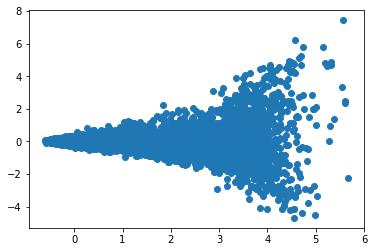

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='AlaBayoudh', api_key='oUzQzqIhUvIRYULient7')
plt.scatter(x = result[:,0],
    y = result[:,1])
'''
trace = go.Scatter(
    x = result[:,0],
    y = result[:,1],
    mode = 'markers'
)

#data = [trace]

# Plot and embed in ipython notebook!
#py.iplot(data, filename='basic-scatter')
'''

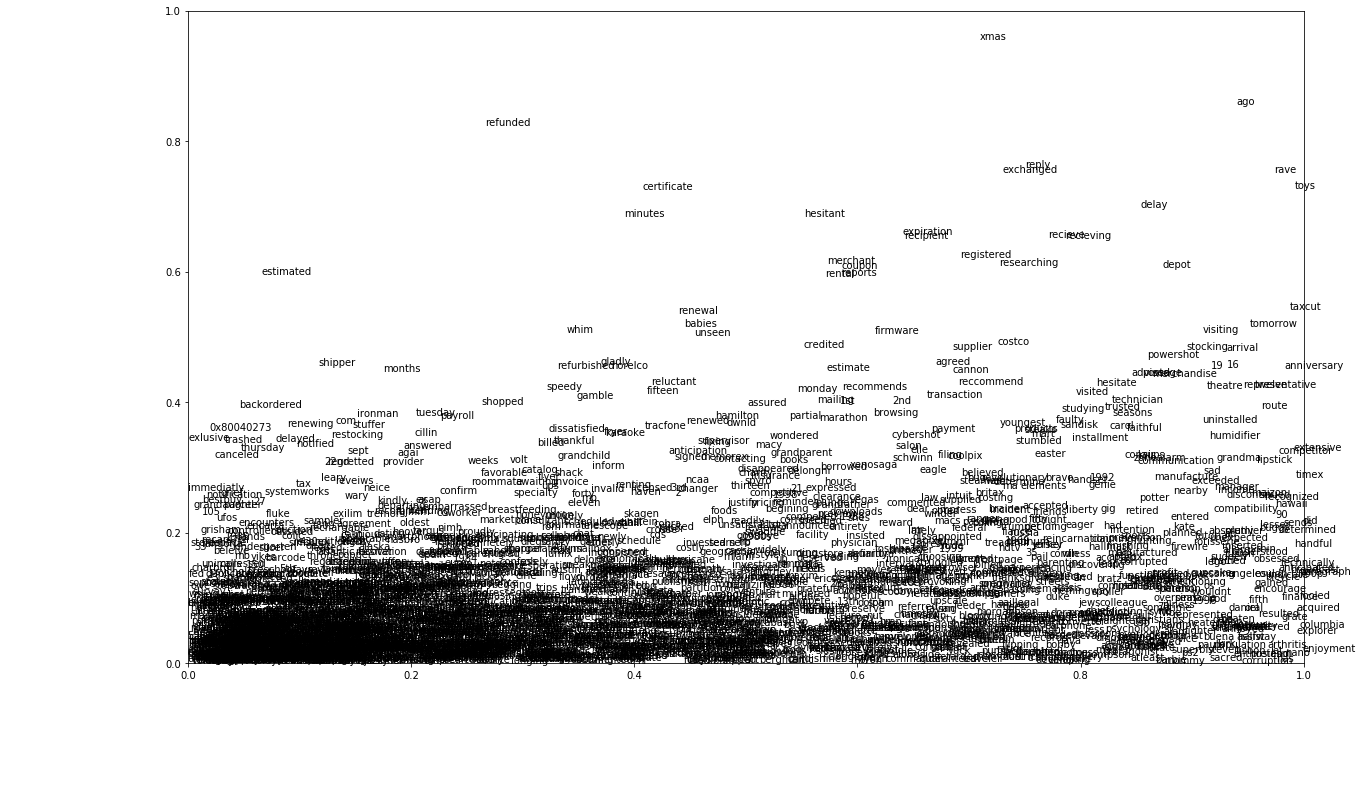

In [10]:
f, ax = plt.subplots(figsize=(20, 12))
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#### for 3d plotly word embeding PCA visualization link :
For rendering link :
https://plot.ly/~AlaBayoudh/4

In [33]:
p1 = go.Scatter3d(x = result[:,0],
    y = result[:,1],z=result[:,2],
                  mode='markers',
                  text = list(model.wv.vocab))
layout=dict(margin=dict(l=10, r=10,
                        t=30, b=10)
           )
fig = go.Figure(data=[p1], layout=layout)

SyntaxError: invalid syntax (<ipython-input-33-62e3c292ec25>, line 5)

In [56]:
py.iplot(fig)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\plotly\plotly\plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [51]:
print(pca.explained_variance_ratio_)

[ 0.60065532  0.07758255  0.06942301]


**t-SNE** : a nonlinear nondeterministic algorithm (T-distributed stochastic neighbor embedding) that tries to preserve local neighborhoods in the data, often at the expense of distorting global structure. You can choose whether to compute two- or three-dimensional projections.

In [17]:
from sklearn.manifold import TSNE
rst = TSNE(n_components=3, random_state=0).fit_transform(X[:100])


In [18]:
listWords = list(model.wv.vocab)

#### For 3d plotly word embeding t-sne 100 words visualization link :
For rendering link :
https://plot.ly/~AlaBayoudh/6

In [31]:
p1 = go.Scatter3d(x = rst[:,0],
    y = rst[:,1],z=rst[:,2],
                  mode='markers',
                  text = listWords[:100])
layout=dict(margin=dict(l=10, r=10,
                        t=30, b=10)
           )
fig = go.Figure(data=[p1], layout=layout)

In [32]:
py.iplot(fig)

Word2Vec training is an unsupervised task, there’s no good way to objectively evaluate the result. Evaluation depends on your end application.

Google has released their testing set of about 20,000 syntactic and semantic test examples, following the “A is to B as C is to D” task. It is provided in the 'datasets' folder.

For example a syntactic analogy of comparative type is bad:worse;good:?. There are total of 9 types of syntactic comparisons in the dataset like plural nouns and nouns of opposite meaning.

The semantic questions contain five types of semantic analogies, such as capital cities (Paris:France;Tokyo:?) or family members (brother:sister;dad:?).

Gensim supports the same evaluation set, in exactly the same format:

In [22]:
print(model.similarity('good', 'amazing'))
print(model.similarity('waste', 'bunch'))

0.783342806074
0.625848514366


D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [23]:
print(model.predict_output_word(['good', 'waste', 'amazing']))

[('money', 0.65961498), ('price', 0.0084408373), ('buck', 0.0010100801), ('thing', 0.00089791534), ('very', 0.00087741629), ('quality', 0.00087091333), ('deal', 0.00070278608), ('what', 0.00064592127), ('song', 0.00064373779), ('dollar', 0.0005954295)]


In [36]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

**t-sne** closest words to 'good'

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



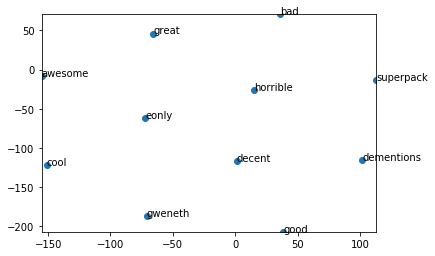

In [37]:
display_closestwords_tsnescatterplot(model, 'good')